In [1]:
### load data
import site; site.addsitedir('..')
import mylib.data as md
reload(md)

df, dfd = md.iris()

In [2]:
df.head()

,name,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
0,setosa,1.4,0.2,5.1,3.5
1,setosa,1.4,0.2,4.9,3.0
2,setosa,1.3,0.2,4.7,3.2
3,setosa,1.5,0.2,4.6,3.1
4,setosa,1.4,0.2,5.0,3.6


/Users/davidcottrell/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/davidcottrell/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/davidcottrell/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


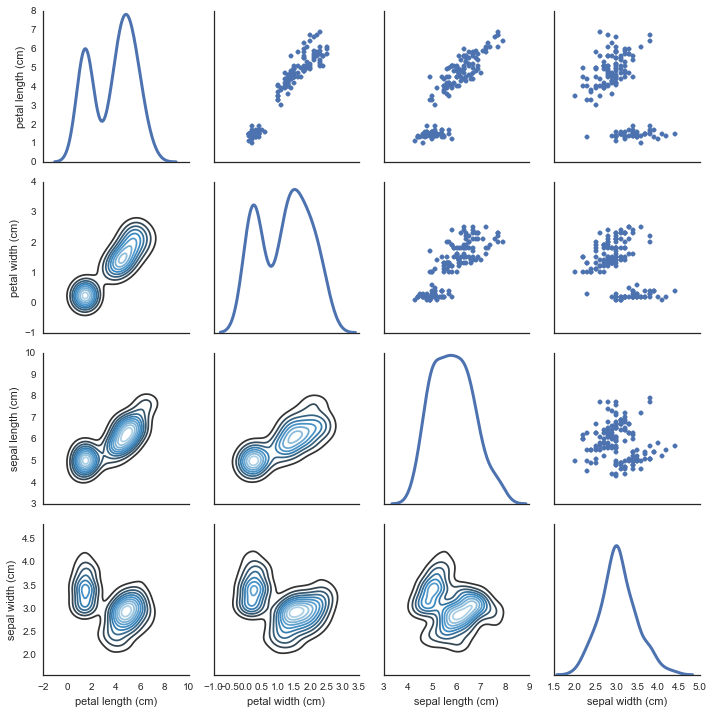

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In [4]:
from sklearn.cross_validation import train_test_split

/Users/davidcottrell/dev/scikit-learn.git/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
y_cols = ['petal length (cm)']
x_cols = [x for x in dfd.columns if x not in y_cols]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dfd[x_cols].values, dfd[y_cols].values, test_size=0.1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(135, 6) (135, 1) (15, 6) (15, 1)


### regresssion

In [9]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

m = X_train.shape[1]
n = y_train.shape[1]

dims = [100, 100, 100]
dropout = 0.5

model = Sequential()
model.add(Dense(input_dim=m, output_dim=dims[0], init='glorot_uniform'))
model.add(Activation('tanh'))
model.add(Dropout(dropout))
model.add(Dense(input_dim=dims[0], output_dim=dims[1], init='glorot_uniform'))
model.add(Activation('tanh'))
model.add(Dropout(dropout))
model.add(Dense(input_dim=dims[1], output_dim=dims[2], init='glorot_uniform'))
model.add(Activation('tanh'))
model.add(Dropout(dropout))
model.add(Dense(input_dim=dims[2], output_dim=n, init='glorot_uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.0025, decay=1e-6, momentum=0.5, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [10]:
out = model.fit(X_train, y_train, nb_epoch=100, batch_size=30, validation_data=(X_test, y_test), show_accuracy=True)

Train on 135 samples, validate on 15 samples
Epoch 1/100
135/135 [==============================] - 0s - loss: 8.0789 - acc: 1.0000 - val_loss: 2.9554 - val_acc: 1.0000
Epoch 2/100
135/135 [==============================] - 0s - loss: 3.7612 - acc: 1.0000 - val_loss: 2.1562 - val_acc: 1.0000
Epoch 3/100
135/135 [==============================] - 0s - loss: 3.8786 - acc: 1.0000 - val_loss: 3.2461 - val_acc: 1.0000
Epoch 4/100
135/135 [==============================] - 0s - loss: 3.4963 - acc: 1.0000 - val_loss: 1.4559 - val_acc: 1.0000
Epoch 5/100
135/135 [==============================] - 0s - loss: 2.8560 - acc: 1.0000 - val_loss: 2.3474 - val_acc: 1.0000
Epoch 6/100
135/135 [==============================] - 0s - loss: 3.4136 - acc: 1.0000 - val_loss: 1.8835 - val_acc: 1.0000
Epoch 7/100
135/135 [==============================] - 0s - loss: 2.7843 - acc: 1.0000 - val_loss: 1.0082 - val_acc: 1.0000
Epoch 8/100
135/135 [==============================] - 0s - loss: 2.8272 - acc: 1.0000 

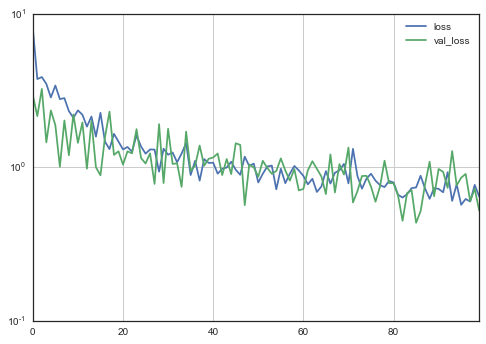

In [11]:
h = pandas.DataFrame(out.history)
h[['loss', 'val_loss']].plot(logy=True)
grid()

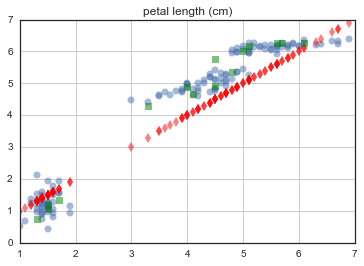

In [24]:
def do_pred_plot(X, y, Xt, yt):
    yp = model.predict(X)
    ypt = model.predict(Xt)
    %matplotlib inline
    for i in range(yp.shape[1]):
        figure()
        clf()
        plot(y[:,i], yp[:,i], 'o', alpha=0.5)
        plot(y[:,i], y[:,i], 'rd', alpha=0.5)
        plot(yt[:,i], ypt[:,i], 'gs', alpha=0.5)
        title(dfd.columns[i])
        grid()
        
do_pred_plot(X_train, y_train, X_test, y_test)

In [26]:
# model.save_weights('iris_weights.h5', overwrite=True)
# w = model.get_weights()

### classification

In [35]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

m = X_train.shape[1]
n = y_train.shape[1]

dims = [100, 100, 100]
dropout = 0.5

model = Sequential()
model.add(Dense(input_dim=m, output_dim=dims[0], init='glorot_uniform'))
model.add(Activation('tanh'))
model.add(Dropout(dropout))
model.add(Dense(input_dim=dims[0], output_dim=dims[1], init='glorot_uniform'))
model.add(Activation('tanh'))
model.add(Dropout(dropout))
model.add(Dense(input_dim=dims[1], output_dim=dims[2], init='glorot_uniform'))
model.add(Activation('tanh'))
model.add(Dropout(dropout))
model.add(Dense(input_dim=dims[2], output_dim=n, init='glorot_uniform'))
model.add(Activation('softmax'))

sgd = SGD(lr=0.0025, decay=1e-6, momentum=0.5, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd)



In [36]:
X_train, X_test, y_train, y_test = train_test_split(dfd[x_cols].values, (dfd[y_cols].values < 0).astype(float), test_size=0.1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(135, 6) (135, 1) (15, 6) (15, 1)


In [37]:
out = model.fit(X_train, y_train, nb_epoch=100, batch_size=30, validation_data=(X_test, y_test), show_accuracy=True)

Train on 135 samples, validate on 15 samples
Epoch 1/100
135/135 [==============================] - 0s - loss: 15.9424 - acc: 1.0000 - val_loss: 15.9424 - val_acc: 1.0000
Epoch 2/100
135/135 [==============================] - 0s - loss: 15.9424 - acc: 1.0000 - val_loss: 15.9424 - val_acc: 1.0000
Epoch 3/100
135/135 [==============================] - 0s - loss: 15.9424 - acc: 1.0000 - val_loss: 15.9424 - val_acc: 1.0000
Epoch 4/100
135/135 [==============================] - 0s - loss: 15.9424 - acc: 1.0000 - val_loss: 15.9424 - val_acc: 1.0000
Epoch 5/100
135/135 [==============================] - 0s - loss: 15.9424 - acc: 1.0000 - val_loss: 15.9424 - val_acc: 1.0000
Epoch 6/100
135/135 [==============================] - 0s - loss: 15.9424 - acc: 1.0000 - val_loss: 15.9424 - val_acc: 1.0000
Epoch 7/100
135/135 [==============================] - 0s - loss: 15.9424 - acc: 1.0000 - val_loss: 15.9424 - val_acc: 1.0000
Epoch 8/100
135/135 [==============================] - 0s - loss: 15.9424